# Shoe Shopping - The Inventary Problem

<img src="images/albundy2.jpg"/>

### General Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Get the Data

In [2]:
# Load the AlBundy dataset
df = pd.read_excel('data/AlBundy.xlsx')

# DataFrame
df.head()

,InvoiceNo,Date,Country,ProductID,Shop,Gender,Size (US),Size (Europe),Size (UK),UnitPrice,Discount,Unnamed: 11,Month,SalePrice
0,52389,2014-01-01 01:06:24,United Kingdom,2152,UK2,Male,11.0,44,10.5,159,0.0,2014,1,159.0
1,52390,2014-01-01 03:44:48,United States,2230,US15,Male,11.5,44-45,11.0,199,0.2,2014,1,159.2
2,52391,2014-01-01 09:01:36,Canada,2160,CAN7,Male,9.5,42-43,9.0,149,0.2,2014,1,119.2
3,52392,2014-01-01 09:16:00,United States,2234,US6,Female,9.5,40,7.5,159,0.0,2014,1,159.0
4,52393,2014-01-01 13:35:12,United Kingdom,2222,UK4,Female,9.0,39-40,7.0,159,0.0,2014,1,159.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14967 entries, 0 to 14966
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   InvoiceNo      14967 non-null  int64         
 1   Date           14967 non-null  datetime64[ns]
 2   Country        14967 non-null  object        
 3   ProductID      14967 non-null  int64         
 4   Shop           14967 non-null  object        
 5   Gender         14967 non-null  object        
 6   Size (US)      14967 non-null  float64       
 7   Size (Europe)  14967 non-null  object        
 8   Size (UK)      14967 non-null  float64       
 9   UnitPrice      14967 non-null  int64         
 10  Discount       14967 non-null  float64       
 11  Unnamed: 11    14967 non-null  int64         
 12  Month          14967 non-null  int64         
 13  SalePrice      14967 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 1.

<AxesSubplot:>

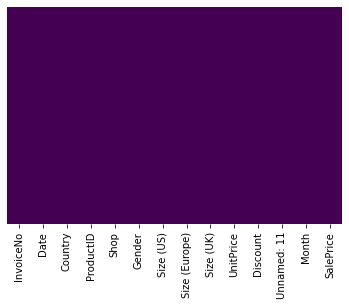

In [4]:
# Heatmap for visualize the missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There is no missing data in our dataset.

### Analysis for Marketing Strategy

<AxesSubplot:title={'center':'Number of Costumers by Gender'}, xlabel='Gender', ylabel='count'>

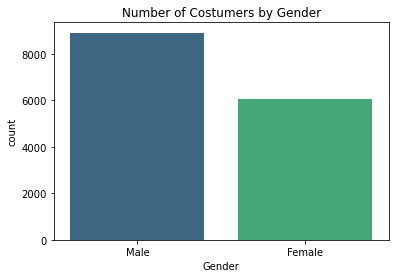

In [5]:
# Plot 'Number of Costumers by Gender'

plt.title('Number of Costumers by Gender')
sns.countplot(x='Gender', data=df, palette='viridis')

In [6]:
# Groupy the mean money by gender

df.groupby(['Gender'])['SalePrice'].mean()

Gender
Female    144.209077
Male      143.837941
Name: SalePrice, dtype: float64

In [7]:
# Group the total spend by gender

region = df.groupby(['Gender'])['SalePrice'].sum().reset_index()
region.head()

,Gender,SalePrice
0,Female,872176.5
1,Male,1282890.6


<BarContainer object of 2 artists>

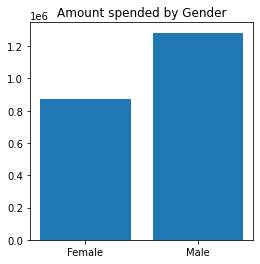

In [8]:
# Plot amount spended by gender

plt.figure(figsize=(4,4))

plt.title('Amount spended by Gender')
plt.bar(region['Gender'],region['SalePrice']) # plt.bar(x,height)

<AxesSubplot:title={'center':'Number of Sales by Country'}, xlabel='Country', ylabel='count'>

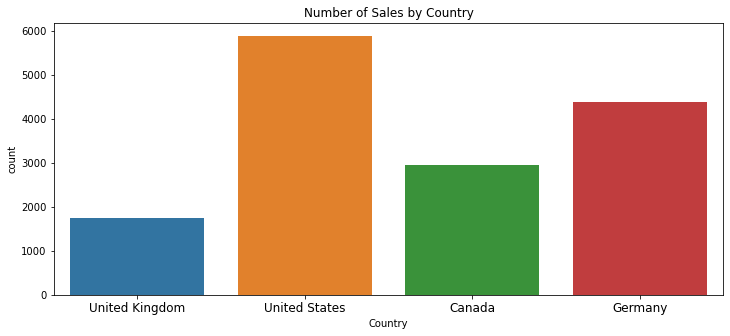

In [9]:
# Plot the number of sales by country

plt.figure(figsize=(12,5))       

plt.title('Number of Sales by Country')
plt.xticks(fontsize=12)

sns.countplot(x='Country',data=df)

### Analysis for Inventory

In [10]:
# Create 2 subsets by gender

female = df[df['Gender']=='Female']

male = df[df['Gender']=='Male']

(4.0, 16.0)

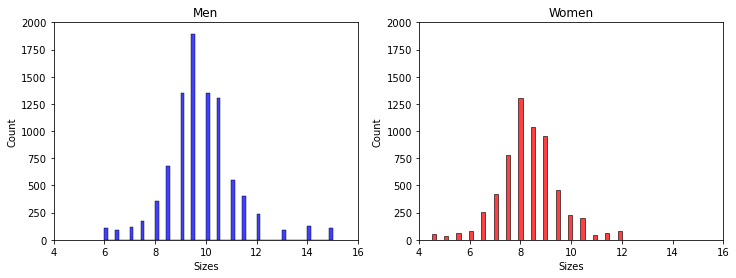

In [11]:
# Plot the Histogram for these two groups

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)     # plt.subplot(nrows, ncols, plot_number)
plt.title('Men')
sns.histplot(male['Size (US)'],color='b')
plt.xlabel('Sizes')
plt.ylim(0, 2000)
plt.xlim(4, 16)

plt.subplot(1,2,2)
plt.title('Women')
sns.histplot(female['Size (US)'],color='r')
plt.xlabel('Sizes')
plt.ylim(0, 2000)
plt.xlim(4, 16)

In [12]:
# Let's see the sales by month

femainv = female[['Size (US)', 'Country','Month', 'Date']]
maleinv = male[['Size (US)', 'Country','Month', 'Date']]

In [13]:
maleinv.head()

,Size (US),Country,Month,Date
0,11.0,United Kingdom,1,2014-01-01 01:06:24
1,11.5,United States,1,2014-01-01 03:44:48
2,9.5,Canada,1,2014-01-01 09:01:36
5,10.5,United States,1,2014-01-01 15:59:12
7,10.0,Canada,1,2014-01-02 09:01:36


<AxesSubplot:title={'center':'Sales for Men in the 3 Year'}, xlabel='Month', ylabel='count'>

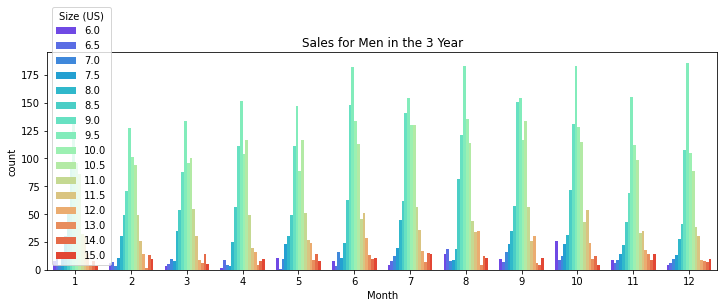

In [14]:
# See the sales in 3 years

plt.figure(figsize=(12,4))

plt.title('Sales for Men in the 3 Year')

sns.countplot(x='Month', hue='Size (US)', data=maleinv, palette='rainbow')

### Make the Male Inventory based in the last year (2016) in the EUA

In [15]:
# Extract the 'year' from 'Date' 

maleinv['year'] = maleinv['Date'].dt.year

maleinv.head()

,Size (US),Country,Month,Date,year
0,11.0,United Kingdom,1,2014-01-01 01:06:24,2014
1,11.5,United States,1,2014-01-01 03:44:48,2014
2,9.5,Canada,1,2014-01-01 09:01:36,2014
5,10.5,United States,1,2014-01-01 15:59:12,2014
7,10.0,Canada,1,2014-01-02 09:01:36,2014


In [16]:
# Drop 'Date'

maleinv.drop(['Date'], axis = 1, inplace = True) 

maleinv.head()

,Size (US),Country,Month,year
0,11.0,United Kingdom,1,2014
1,11.5,United States,1,2014
2,9.5,Canada,1,2014
5,10.5,United States,1,2014
7,10.0,Canada,1,2014


In [17]:
# Now, lets get only the last year (2016)

maleinv1 = maleinv[maleinv['year'] == 2016]

maleinv1.head()

,Size (US),Country,Month,year
7601,10.5,Germany,1,2016
7602,9.0,Germany,1,2016
7605,9.0,Germany,1,2016
7608,10.0,Canada,1,2016
7609,11.0,Germany,1,2016


In [18]:
# Get only Sales in EUA

maleinv1 = maleinv1[maleinv1['Country'] == 'United States']

maleinv1.head()

,Size (US),Country,Month,year
7617,9.5,United States,1,2016
7619,8.5,United States,1,2016
7629,8.0,United States,1,2016
7631,8.0,United States,1,2016
7632,14.0,United States,1,2016


In [19]:
# Let's drop some unnecessary columns 

maleinv1.drop(['year'], axis = 1, inplace = True) 

maleinv1.drop(['Country'], axis = 1, inplace = True)

maleinv1.head()

,Size (US),Month
7617,9.5,1
7619,8.5,1
7629,8.0,1
7631,8.0,1
7632,14.0,1


In [20]:
# Make 12 months columns

maleinv1enc = pd.get_dummies(maleinv1, columns=['Month'])

maleinv1enc.head()

,Size (US),Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
7617,9.5,1,0,0,0,0,0,0,0,0,0,0,0
7619,8.5,1,0,0,0,0,0,0,0,0,0,0,0
7629,8.0,1,0,0,0,0,0,0,0,0,0,0,0
7631,8.0,1,0,0,0,0,0,0,0,0,0,0,0
7632,14.0,1,0,0,0,0,0,0,0,0,0,0,0


In [21]:
maleinv1enc.columns

Index(['Size (US)', 'Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5',
       'Month_6', 'Month_7', 'Month_8', 'Month_9', 'Month_10', 'Month_11',
       'Month_12'],
      dtype='object')

In [22]:
maleinv1enc.columns = ['Size (US)', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 
                      'M8', 'M9', 'M10', 'M11', 'M12']

In [23]:
maleinv1enc.columns

Index(['Size (US)', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9',
       'M10', 'M11', 'M12'],
      dtype='object')

In [24]:
# Let's make the DataFrame more readable

make = maleinv1enc.groupby(['Size (US)'])['M1', 'M2', 'M3', 'M4', 
                                         'M5', 'M6', 'M7', 'M8', 
                                         'M9', 'M10', 'M11', 'M12'].sum()

make.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12
Size (US),,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0
6.5,3,2,0,1,0,0,1,7,2,1,2,1
7.0,0,0,1,0,6,4,4,2,3,0,0,0
7.5,3,2,3,1,7,0,7,3,4,6,1,1
8.0,7,9,7,3,12,2,9,4,7,5,2,6


As we see in the graphs, we can assume normality. To make the inventory, we want to estimate the number of shoes that are likely to be sold and 95 percent confidence interval will give us such information.

<img src="images/lubounds.png"/>

In [25]:
make['Mean'] = make[['M1','M2','M3', 'M4',
                     'M5','M6','M7', 'M8',
                     'M9','M10','M11', 'M12']].mean(axis=1)

make.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Mean
Size (US),,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0,2.916667
6.5,3,2,0,1,0,0,1,7,2,1,2,1,1.666667
7.0,0,0,1,0,6,4,4,2,3,0,0,0,1.666667
7.5,3,2,3,1,7,0,7,3,4,6,1,1,3.166667
8.0,7,9,7,3,12,2,9,4,7,5,2,6,6.083333


In [26]:
# Create a 'Stand Error' column

sqrt_n = np.sqrt(12)

make['Stand Error'] = (make[['M1','M2','M3', 'M4',
                             'M5','M6','M7', 'M8',
                             'M9','M10','M11', 'M12']].std(axis=1))/sqrt_n

make.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Mean,Stand Error
Size (US),,,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0,2.916667,0.514315
6.5,3,2,0,1,0,0,1,7,2,1,2,1,1.666667,0.555050
7.0,0,0,1,0,6,4,4,2,3,0,0,0,1.666667,0.607196
7.5,3,2,3,1,7,0,7,3,4,6,1,1,3.166667,0.694495
8.0,7,9,7,3,12,2,9,4,7,5,2,6,6.083333,0.882990


With only 12 observations by sample, we need to use t-statistic:

In [27]:
# t-statistic for 95% C.I.
import scipy

n = 12
dof = n - 1

loc = 0.95
alpha = (1 - loc)/2

t = abs(scipy.stats.t.ppf(alpha, dof))

print('t-statistic:',round(t,2))

t-statistic: 2.2


In [28]:
# Create a 'Margin of Error' column

make['Margin Error'] = abs((make[['Stand Error']])*t)      # We apply here 
                                                           # t-statistic
make.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Mean,Stand Error,Margin Error
Size (US),,,,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0,2.916667,0.514315,1.132000
6.5,3,2,0,1,0,0,1,7,2,1,2,1,1.666667,0.555050,1.221657
7.0,0,0,1,0,6,4,4,2,3,0,0,0,1.666667,0.607196,1.336429
7.5,3,2,3,1,7,0,7,3,4,6,1,1,3.166667,0.694495,1.528573
8.0,7,9,7,3,12,2,9,4,7,5,2,6,6.083333,0.882990,1.943448


In [29]:
# Create a '95% CI' column

make['lower bound'] = make['Mean'] - make['Margin Error']

make['upper bound'] = make['Mean'] + make['Margin Error'] 

make.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Mean,Stand Error,Margin Error,lower bound,upper bound
Size (US),,,,,,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0,2.916667,0.514315,1.132000,1.784666,4.048667
6.5,3,2,0,1,0,0,1,7,2,1,2,1,1.666667,0.555050,1.221657,0.445009,2.888324
7.0,0,0,1,0,6,4,4,2,3,0,0,0,1.666667,0.607196,1.336429,0.330237,3.003096
7.5,3,2,3,1,7,0,7,3,4,6,1,1,3.166667,0.694495,1.528573,1.638094,4.695240
8.0,7,9,7,3,12,2,9,4,7,5,2,6,6.083333,0.882990,1.943448,4.139885,8.026782


The result we obtained can be interpreted as follows. In 95% of the cases the true population mean of sales for each shoe size will fall into the respective interval.

As we don't want to be low on stock, a possible solution to the problem is get as many pairs of shoes as the closest number to the upper limit of the confidence interval.

In this way, you will be almost certain you won't run out of stock and shoes won't be waiting foreverin your storage unit.

In [30]:
# Create a 'Number of Pairs' column

make['Number of Pairs'] = round(make['upper bound'])

make.head()

,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,Mean,Stand Error,Margin Error,lower bound,upper bound,Number of Pairs
Size (US),,,,,,,,,,,,,,,,,,
6.0,4,1,3,1,3,3,3,4,3,7,3,0,2.916667,0.514315,1.132000,1.784666,4.048667,4.0
6.5,3,2,0,1,0,0,1,7,2,1,2,1,1.666667,0.555050,1.221657,0.445009,2.888324,3.0
7.0,0,0,1,0,6,4,4,2,3,0,0,0,1.666667,0.607196,1.336429,0.330237,3.003096,3.0
7.5,3,2,3,1,7,0,7,3,4,6,1,1,3.166667,0.694495,1.528573,1.638094,4.695240,5.0
8.0,7,9,7,3,12,2,9,4,7,5,2,6,6.083333,0.882990,1.943448,4.139885,8.026782,8.0


In [31]:
final = make [['Mean', 'Stand Error', 'Margin Error', 'lower bound',
               'upper bound', 'Number of Pairs']]

final.head(16)

,Mean,Stand Error,Margin Error,lower bound,upper bound,Number of Pairs
Size (US),,,,,,
6.0,2.916667,0.514315,1.132000,1.784666,4.048667,4.0
6.5,1.666667,0.555050,1.221657,0.445009,2.888324,3.0
7.0,1.666667,0.607196,1.336429,0.330237,3.003096,3.0
7.5,3.166667,0.694495,1.528573,1.638094,4.695240,5.0
8.0,6.083333,0.882990,1.943448,4.139885,8.026782,8.0
8.5,10.750000,1.122261,2.470080,8.279920,13.220080,13.0
9.0,18.833333,1.968823,4.333349,14.499984,23.166683,23.0
9.5,30.333333,2.447427,5.386751,24.946583,35.720084,36.0
10.0,22.750000,1.567303,3.449611,19.300389,26.199611,26.0


## Problem 2: Comparing two germany shops

**By how much one shop outperform s tho other in terms of sales?** 

In [32]:
# Load the 2 german companies dataset
dg = pd.read_excel('data/2germanys.xlsx')

# DataFrame
dg.head()

,US,g1,g2,g3,g4,g5,g6,g7,g8,g9,...,h3,h4,h5,h6,h7,h8,h9,h10,h11,h12
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,0,0,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5.0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,0,0
3,5.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,1
4,6.0,0,2,0,0,0,0,0,0,0,...,3,1,2,0,0,0,0,0,0,0


In [33]:
dg.columns

Index(['US', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10',
       'g11', 'g12', 'h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9',
       'h10', 'h11', 'h12'],
      dtype='object')

In [34]:
dg.columns = ['Size (US)', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 
              'A9', 'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 
              'B7', 'B8', 'B9', 'B10', 'B11', 'B12']

dg.head()

,Size (US),A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B3,B4,B5,B6,B7,B8,B9,B10,B11,B12
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.5,0,0,0,0,1,3,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,5.0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,2,0,0,0,0
3,5.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,0,1
4,6.0,0,2,0,0,0,0,0,0,0,...,3,1,2,0,0,0,0,0,0,0


Above, we can see a table representing the sales of women shoes in two German shops from the last year.

Now an assumption that we have to make is that the same people don't buy pairs of shoes from different shops. Logically it makes sense that in the same year the same people don't go around different shops of the same brand to buy shoes. Even if this happens it is an exception and not the norm. 

Therefore we can say that the two samples are *independent*. Once again we don't know the population variance. But given that this is the same market in the same country we can assume it has equal. This implies we are in the case of independent samples with population variance. Unknown, but assumed to be equal like in the previous case.

In [35]:
# Let's create the 2 columns: 'Mean1' and 'Mean2'

dg['Mean1'] = dg[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 
                      'A9', 'A10', 'A11', 'A12']].mean(axis=1)

dg['Mean2'] = dg[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 
                  'B9', 'B10', 'B11', 'B12']].mean(axis=1)

dg.head()

,Size (US),A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B5,B6,B7,B8,B9,B10,B11,B12,Mean1,Mean2
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.000000,0.000000
1,4.5,0,0,0,0,1,3,0,0,0,...,0,0,0,0,0,1,0,0,0.416667,0.083333
2,5.0,0,0,0,0,0,0,2,0,0,...,0,0,0,2,0,0,0,0,0.166667,0.166667
3,5.5,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,1,0.083333,0.333333
4,6.0,0,2,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0.166667,0.583333


In [36]:
# Create the 2 columns: 'Sample Var1' and 'Sample Var2'

dg['Sample Var1'] = dg[['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 
                        'A9', 'A10', 'A11', 'A12']].var(axis=1)

dg['Sample Var2'] = dg[['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 
                        'B9', 'B10', 'B11', 'B12']].var(axis=1)

dg.head()

,Size (US),A1,A2,A3,A4,A5,A6,A7,A8,A9,...,B7,B8,B9,B10,B11,B12,Mean1,Mean2,Sample Var1,Sample Var2
0,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000
1,4.5,0,0,0,0,1,3,0,0,0,...,0,0,0,1,0,0,0.416667,0.083333,0.810606,0.083333
2,5.0,0,0,0,0,0,0,2,0,0,...,0,2,0,0,0,0,0.166667,0.166667,0.333333,0.333333
3,5.5,0,0,0,0,0,0,0,0,0,...,0,1,0,2,0,1,0.083333,0.333333,0.083333,0.424242
4,6.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.166667,0.583333,0.333333,0.992424


In [37]:
dg.columns

Index(['Size (US)', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9',
       'A10', 'A11', 'A12', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8',
       'B9', 'B10', 'B11', 'B12', 'Mean1', 'Mean2', 'Sample Var1',
       'Sample Var2'],
      dtype='object')

In [38]:
# Make a clean table

ger = dg[['Size (US)','Mean1', 'Mean2', 'Sample Var1','Sample Var2']]

ger.head()

,Size (US),Mean1,Mean2,Sample Var1,Sample Var2
0,4.0,0.000000,0.000000,0.000000,0.000000
1,4.5,0.416667,0.083333,0.810606,0.083333
2,5.0,0.166667,0.166667,0.333333,0.333333
3,5.5,0.083333,0.333333,0.083333,0.424242
4,6.0,0.166667,0.583333,0.333333,0.992424


In [39]:
# Pooled Variance

n1 = 12
n2 = 12
dof = n1 + n2 - 2

ger['Pooled Var'] = ((n1-1)*ger['Sample Var1']+(n2-1)*ger['Sample Var2'])/dof

ger.head()

,Size (US),Mean1,Mean2,Sample Var1,Sample Var2,Pooled Var
0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.5,0.416667,0.083333,0.810606,0.083333,0.446970
2,5.0,0.166667,0.166667,0.333333,0.333333,0.333333
3,5.5,0.083333,0.333333,0.083333,0.424242,0.253788
4,6.0,0.166667,0.583333,0.333333,0.992424,0.662879


In [40]:
# t-statistic for 95% C.I.

import scipy

loc = 0.95
alpha = (1 - loc)/2

t = abs(scipy.stats.t.ppf(alpha, dof))

print('t-statistic:',round(t,2))

t-statistic: 2.07


In [41]:
# Margin of Error

ger['Margin Error'] = t*np.sqrt( ger['Pooled Var']/n1 + ger['Pooled Var']/n2 )
                                                           
ger.head()

,Size (US),Mean1,Mean2,Sample Var1,Sample Var2,Pooled Var,Margin Error
0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.5,0.416667,0.083333,0.810606,0.083333,0.446970,0.566038
2,5.0,0.166667,0.166667,0.333333,0.333333,0.333333,0.488817
3,5.5,0.083333,0.333333,0.083333,0.424242,0.253788,0.426523
4,6.0,0.166667,0.583333,0.333333,0.992424,0.662879,0.689324


In [42]:
# Create a '95% CI' column

ger['lower bound'] = ger['Mean1'] - ger['Mean2'] - ger['Margin Error']

ger['upper bound'] = ger['Mean1'] - ger['Mean2'] + ger['Margin Error']

ger.head(15)

,Size (US),Mean1,Mean2,Sample Var1,Sample Var2,Pooled Var,Margin Error,lower bound,upper bound
0,4.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,4.5,0.416667,0.083333,0.810606,0.083333,0.446970,0.566038,-0.232705,0.899371
2,5.0,0.166667,0.166667,0.333333,0.333333,0.333333,0.488817,-0.488817,0.488817
3,5.5,0.083333,0.333333,0.083333,0.424242,0.253788,0.426523,-0.676523,0.176523
4,6.0,0.166667,0.583333,0.333333,0.992424,0.662879,0.689324,-1.105991,0.272658
5,6.5,1.833333,1.250000,1.606061,0.931818,1.268939,0.953733,-0.370400,1.537067
6,7.0,1.250000,1.583333,2.022727,2.265152,2.143939,1.239689,-1.573022,0.906356
7,7.5,3.250000,5.333333,4.931818,16.060606,10.496212,2.742981,-4.826315,0.659648
8,8.0,6.083333,7.333333,12.265152,12.242424,12.253788,2.963751,-4.213751,1.713751
9,8.5,8.083333,6.666667,7.719697,4.969697,6.344697,2.132613,-0.715946,3.549279


Finally the 95 percent confidence our are determined by the means and the margins of error what we get are these 15 intervals. Zero is a part of all of them.

With the exception of the unsellable size for all confidence intervals start in the negatives and finish in the positives. This implies that we cannot conclude that one shop sells significantly more shoes than the other for any size.

While it seems like we have no great insight that's not entirely true. The confidence intervals that we got are not consistently in favor of one shop having higher sales or the other.

This is evident from the fact that some of them are mostly negative while others are mostly positive. That is the show that for some sizes one company is likely to sell more while for others. And vice-versa.

However our decision was that using this methodology and level of confidence we cannot really identify which shop is selling more. They are identical.

The inside that we get is that these two shops are so balance in terms of sales that they may share the same warehouse or exchange pairs of shoes to achieve better results.

Furthermore they can be bundled together for any analysis action or decision needed. On average we expect them to move together.

Moreover if one noticeably outperforms the other in the future we may be sure that something that wasn't observed before is going on as they are predicted to remain identical.